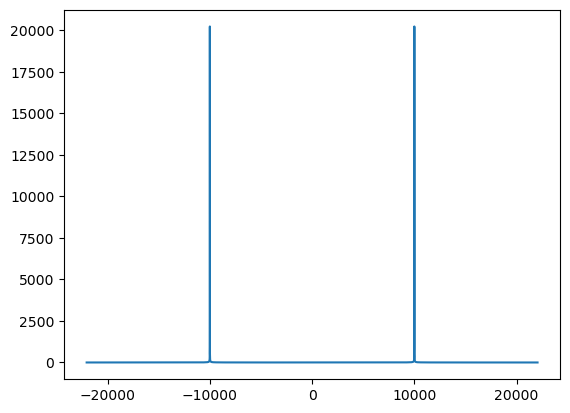

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift
fs = 44100  # Sampling rate
freq = 10000
seconds = 1  # Duration of recording
time = np.linspace(0,seconds,fs)
mysignal_in_time = np.cos(2*np.pi*freq*time)
frequencies = np.linspace(-fs/2,fs/2,fs)
mysignal_in_frequency_abs = fftshift(np.abs(fft(mysignal_in_time)))
plt.figure(2)
plt.plot(frequencies, mysignal_in_frequency_abs)
plt.show()

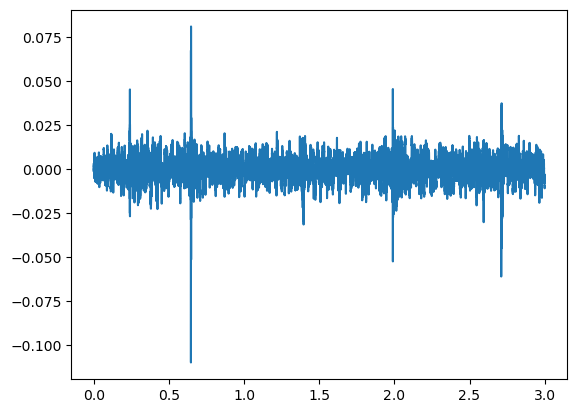

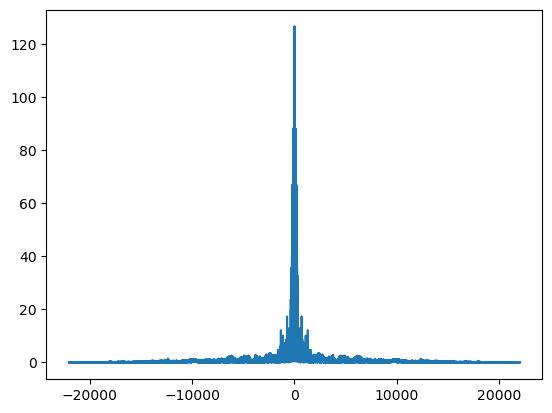

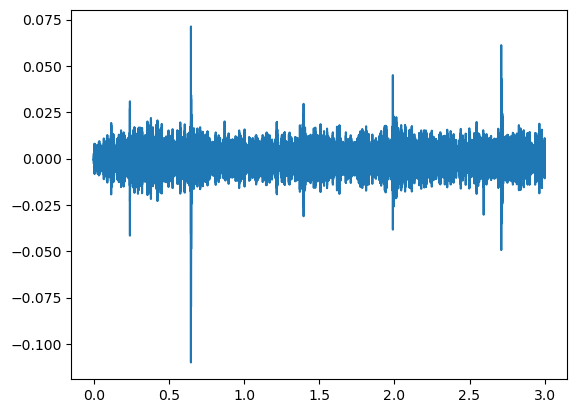

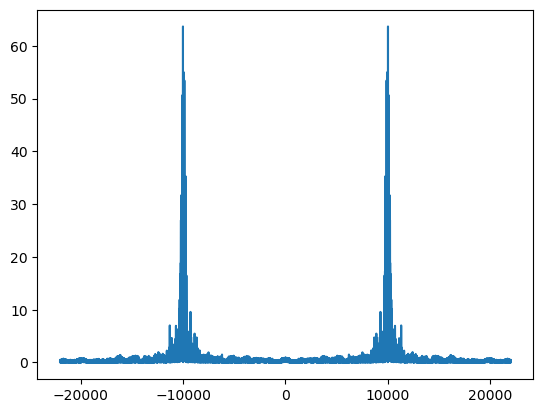

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift
import sounddevice as sd
# recording the sound
fs = 44100 # Sample rate
seconds = 3 # Duration of recording
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording is finished

# display the sound signal
myrecording_in_time = np.squeeze(myrecording)
time = np.linspace(0,seconds,myrecording_in_time.shape[0])
plt.figure(1)
plt.plot(time,myrecording_in_time)

# ft the sound signal and display its magnitude
frequencies = np.linspace(-fs/2,fs/2,fs*seconds)
myrecording_in_frequency_abs = fftshift(np.abs(fft(myrecording_in_time)))
plt.figure(2)
plt.plot(frequencies , myrecording_in_frequency_abs)

#modulate the signal
myrecording_in_time_modulated = np.multiply(myrecording_in_time, np.cos(2*np.pi*10000*time))

plt.figure(3)
plt.plot(time,myrecording_in_time_modulated)

myrecording_in_frequency_modulated_abs = fftshift(np.abs(fft(myrecording_in_time_modulated)))
plt.figure(4)
plt.plot(frequencies , myrecording_in_frequency_modulated_abs)

plt.show()

Text(0.5, 0, 'frequency (Hz)')

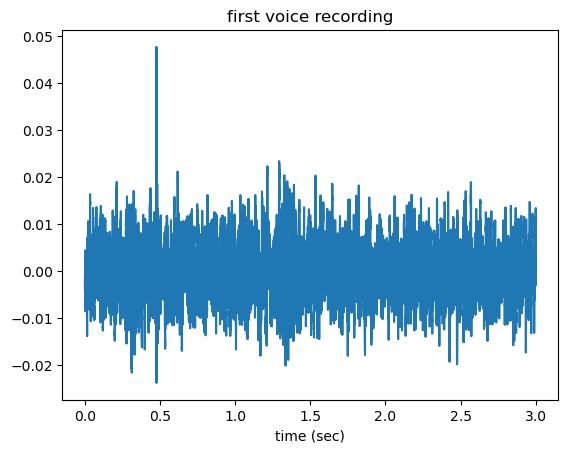

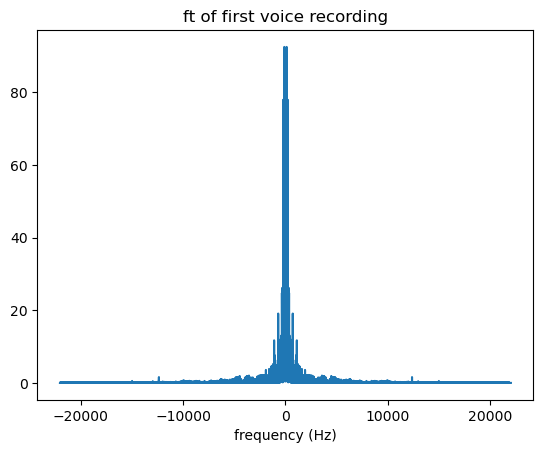

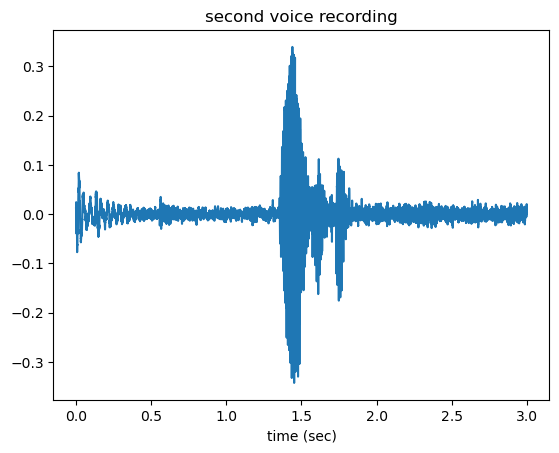

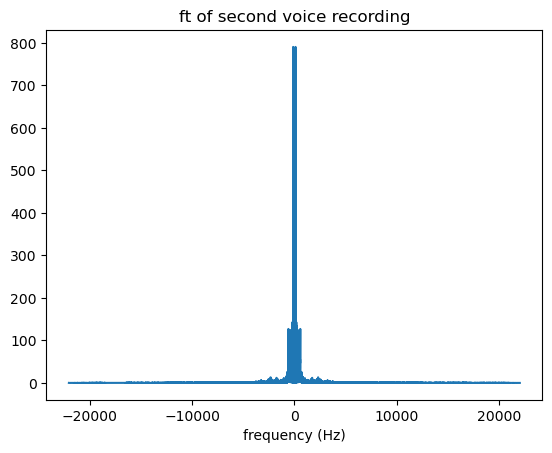

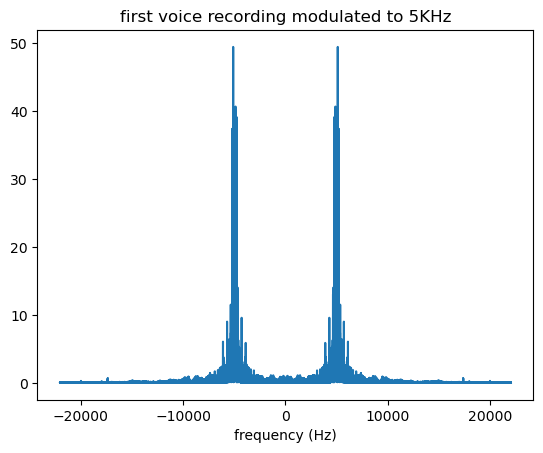

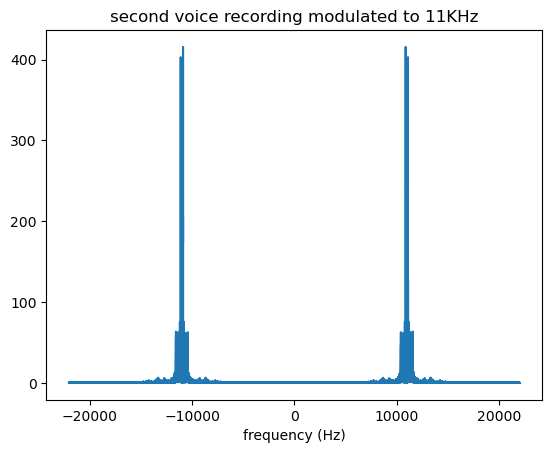

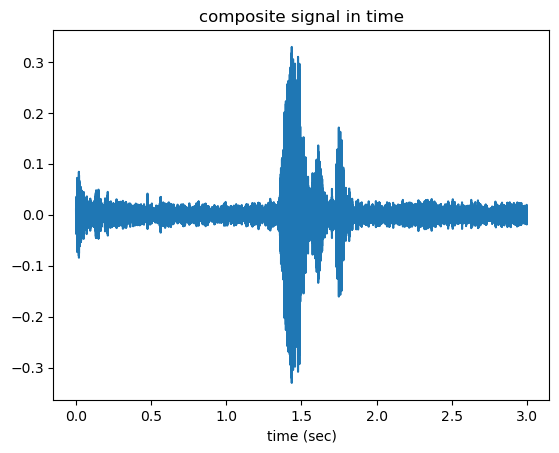

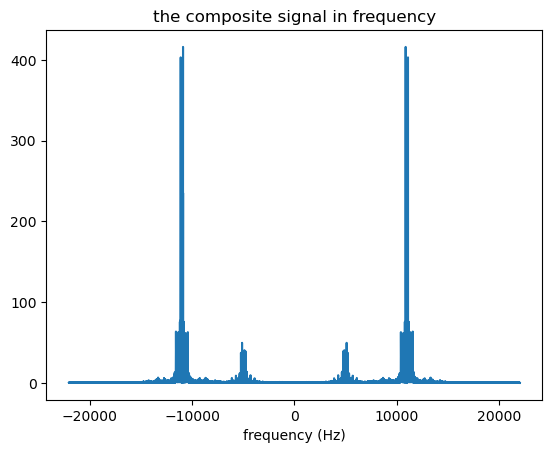

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift, ifft
import sounddevice as sd
# recording the sound
fs = 44100 # Sample rate
seconds = 3 # Duration of recording
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording is finished
# display the sound signal
myrecording_in_time_1 = np.squeeze(myrecording)
time = np.linspace(0,seconds,myrecording_in_time_1.shape[0])
plt.figure(1)
plt.plot(time , myrecording_in_time_1)
plt.title("first voice recording")
plt.xlabel("time (sec)")
# ft the sound signal and display its magnitude
frequencies = np.linspace(-fs/2,fs/2,fs*seconds)
myrecording_in_frequency_1 = fftshift(fft(myrecording_in_time_1))
plt.figure(2)
plt.plot(frequencies , np.abs(myrecording_in_frequency_1))
plt.title("ft of first voice recording")
plt.xlabel("frequency (Hz)")

xx = input('After pressing return, enter your voice: ')
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording is finished
# display the sound signal
myrecording_in_time_2 = np.squeeze(myrecording)
plt.figure(3)
plt.plot(time  ,myrecording_in_time_2)
plt.title("second voice recording")
plt.xlabel("time (sec)")
# ft the sound signal and display its magnitude
myrecording_in_frequency_2 = fftshift(fft(myrecording_in_time_2))
plt.figure(4)
plt.plot(frequencies , np.abs(myrecording_in_frequency_2))
plt.title("ft of second voice recording")
plt.xlabel("frequency (Hz)")
#modulate the signal
myrecording_in_time_modulated_1 = np.multiply(myrecording_in_time_1, np.cos(2*np.pi*5000*time))
plt.figure(5)
plt.plot(frequencies , np.abs(fftshift(fft(myrecording_in_time_modulated_1))))
plt.title("first voice recording modulated to 5KHz")
plt.xlabel("frequency (Hz)")

myrecording_in_time_modulated_2 = np.multiply(myrecording_in_time_2, np.cos(2*np.pi*11000*time))
plt.figure(6)
plt.plot(frequencies , np.abs(fftshift(fft(myrecording_in_time_modulated_2))))
plt.title("second voice recording modulated to 11KHz")
plt.xlabel("frequency (Hz)")

myrecording_in_time_modulated = np.add(myrecording_in_time_modulated_1,myrecording_in_time_modulated_2)
plt.figure(7)
plt.plot(time,myrecording_in_time_modulated)
plt.title("composite signal in time")
plt.xlabel("time (sec)")

myrecording_in_frequency_modulated = fftshift(fft(myrecording_in_time_modulated))
plt.figure(8)
plt.plot(frequencies , np.abs(myrecording_in_frequency_modulated))
plt.title("the composite signal in frequency")
plt.xlabel("frequency (Hz)")

playing the signal in time modulated


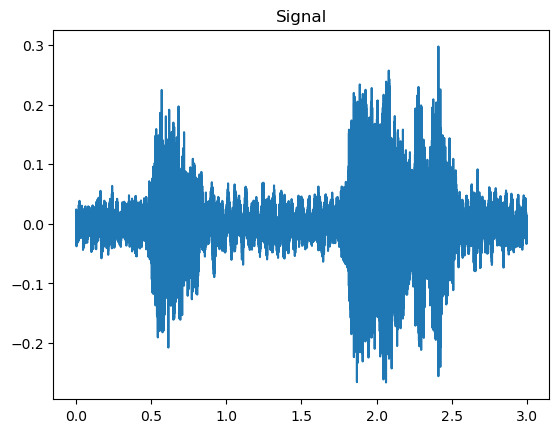

Text(0.5, 0, 'frequency (Hz)')

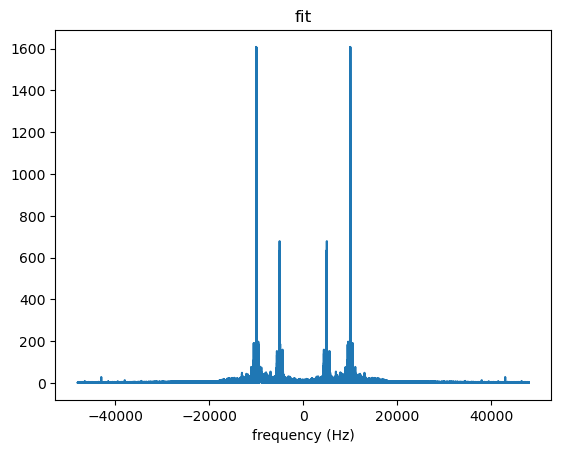

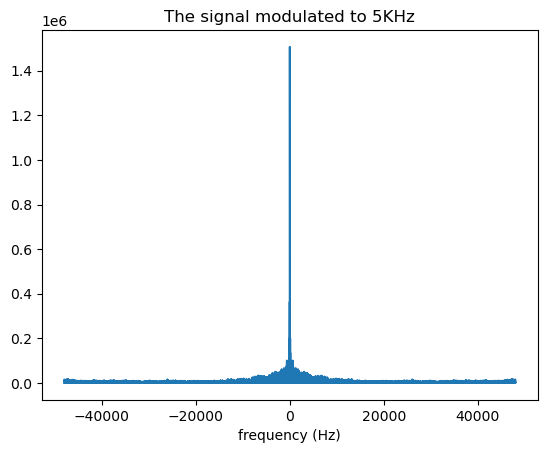

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift
import sounddevice as sd

with open('8.txt', 'r') as file:
    signal = file.read().splitlines()

signal = np.array(signal, dtype=float)

fs = 96000 #sample rate
fr = 5000 #frequency
length = len(signal) / fs #seconds
frs = np.linspace(-fs/2,fs/2,fs*int(length)) #frequencies
t = np.linspace(0, length, signal.shape[0]) #times

signal_n = signal / np.max(np.abs(signal))
signal_mod = np.multiply(signal,np.cos(2*np.pi*fr*t))
signal_fr = fftshift(np.abs(fft(signal)))
signal_fr_mod = fftshift(np.abs(fft(signal_mod)))


print("playing the signal in time modulated")
sd.play(signal_mod, samplerate=fs)
sd.wait()

plt.figure(1)
plt.plot(t,signal_mod)
plt.title("Signal")
plt.show()

plt.figure(2)
plt.plot(frs , np.abs(signal_fr))
plt.title("fit")
plt.xlabel("frequency (Hz)")

plt.figure(3)
plt.plot(frs , np.abs(fftshift(fft(signal_fr_mod))))
plt.title("The signal modulated to 5KHz")
plt.xlabel("frequency (Hz)")

Playing the signal in time modulated


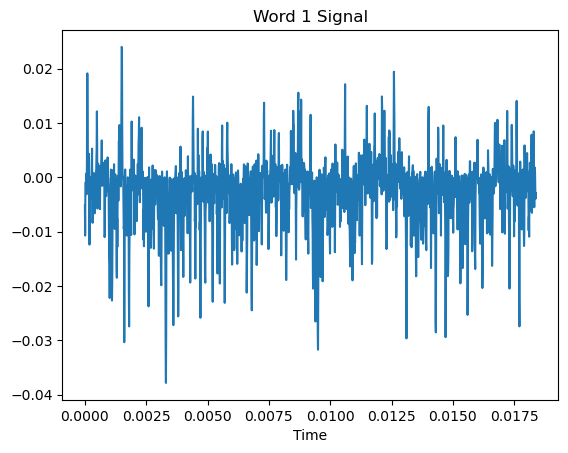

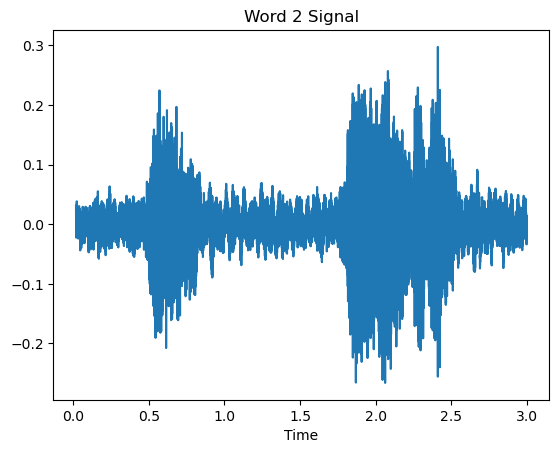

In [17]:
#TWO WORDS 
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
import sounddevice as sd

with open('8.txt', 'r') as file:
    signal = file.read().splitlines()

signal = np.array(signal, dtype=float)

fs = 96000  # sample rate
fr = 5000  # frequency
length = len(signal) / fs  # seconds
frs = np.linspace(-fs/2, fs/2, fs*int(length))  # frequencies
t = np.linspace(0, length, signal.shape[0])  # times

signal_n = signal / np.max(np.abs(signal))
signal_mod = np.multiply(signal, np.cos(2*np.pi*fr*t))
signal_fr = fftshift(np.abs(fft(signal)))
signal_fr_mod = fftshift(np.abs(fft(signal_mod)))

print("Playing the signal in time modulated")
sd.play(signal_mod, samplerate=fs)
sd.wait()

# Set a threshold for signal separation
threshold = 0.1 * np.max(signal_mod)

# Find indices where signal_mod crosses the threshold
crossings = np.where(np.diff((signal_mod > threshold).astype(int)) == 1)[0]

# Separate the signals based on the crossings
word1_signal = signal_mod[:crossings[0]]
word2_signal = signal_mod[crossings[0]:]

# Create corresponding time arrays
t_word1 = t[:crossings[0]]
t_word2 = t[crossings[0]:]

# Plotting the separated signals
plt.figure(1)
plt.plot(t_word1, word1_signal)
plt.title("Word 1 Signal")
plt.xlabel("Time")
plt.show()

plt.figure(2)
plt.plot(t_word2, word2_signal)
plt.title("Word 2 Signal")
plt.xlabel("Time")
plt.show()


Playing the filtered signal


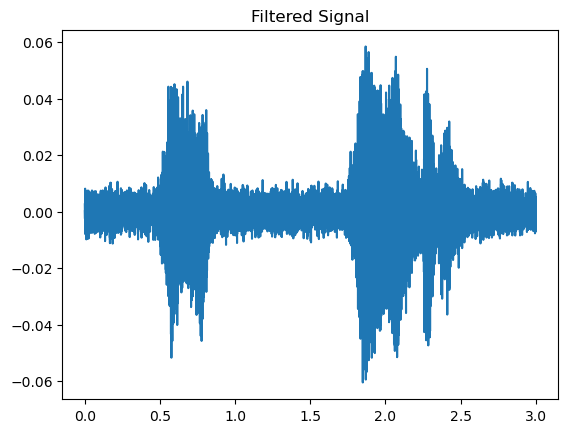

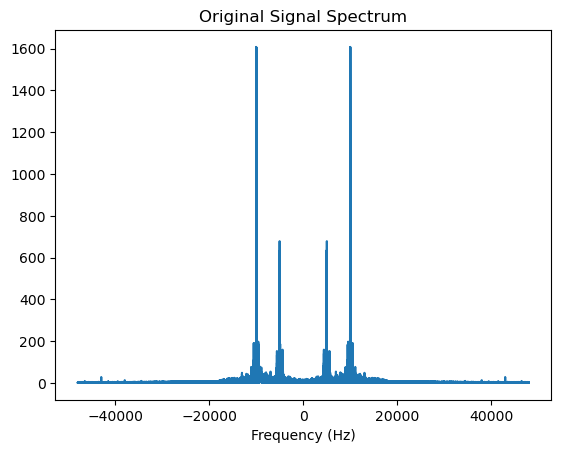

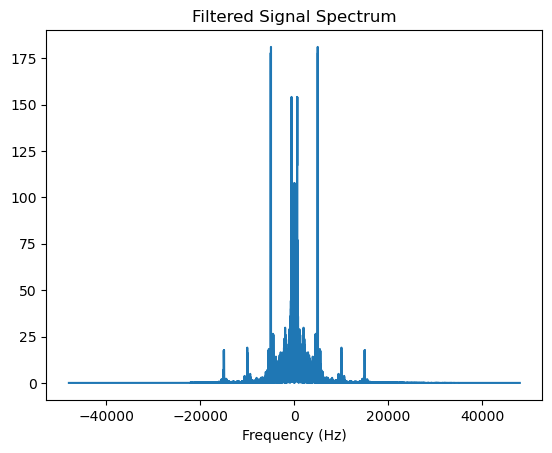

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift
from scipy.signal import butter, lfilter
import sounddevice as sd

with open('8.txt', 'r') as file:
    signal = file.read().splitlines()

signal = np.array(signal, dtype=float)

fs = 96000  # sample rate
fr = 5000  # frequency
length = len(signal) / fs  # seconds
frs = np.linspace(-fs/2, fs/2, fs*int(length))  # frequencies
t = np.linspace(0, length, signal.shape[0])  # times

signal_n = signal / np.max(np.abs(signal))
signal_mod = np.multiply(signal, np.cos(2 * np.pi * fr * t))
signal_fr = fftshift(np.abs(fft(signal)))
signal_fr_mod = fftshift(np.abs(fft(signal_mod)))

# Bandpass filter parameters
f_low = 100  # Lower cutoff frequency
f_high = 2500 # Upper cutoff frequency
order = 2  # Filter order

# Design bandpass filter
b, a = butter(order, [f_low, f_high], fs=fs, btype='band')

# Apply filter to the modulated signal
signal_mod_filtered = lfilter(b, a, signal_mod)

print("Playing the filtered signal")
sd.play(signal_mod_filtered, samplerate=fs)
sd.wait()

plt.figure(1)
plt.plot(t, signal_mod_filtered)
plt.title("Filtered Signal")
plt.show()

plt.figure(2)
plt.plot(frs, np.abs(signal_fr))
plt.title("Original Signal Spectrum")
plt.xlabel("Frequency (Hz)")

plt.figure(3)
plt.plot(frs, np.abs(fftshift(fft(signal_mod_filtered))))
plt.title("Filtered Signal Spectrum")
plt.xlabel("Frequency (Hz)")

plt.show()


Playing the signal in time modulated
Playing Word 1
Playing Word 2


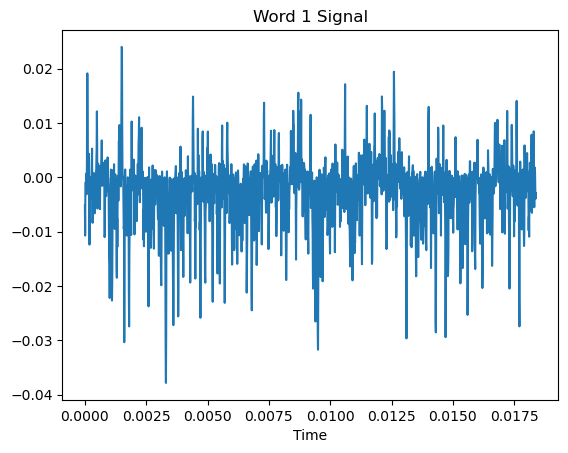

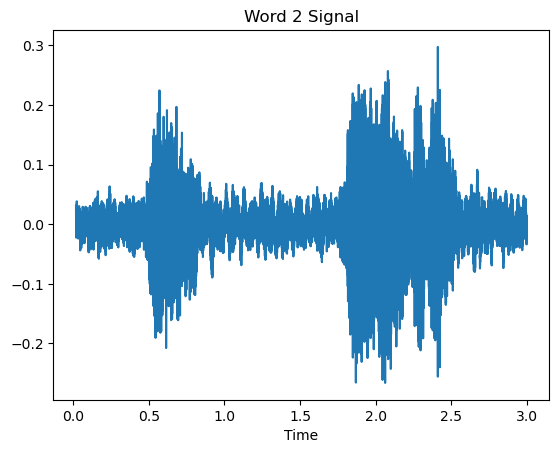

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
import sounddevice as sd

with open('8.txt', 'r') as file:
    signal = file.read().splitlines()

signal = np.array(signal, dtype=float)

fs = 96000  # sample rate
fr = 5000  # frequency
length = len(signal) / fs  # seconds
frs = np.linspace(-fs/2, fs/2, fs*int(length))  # frequencies
t = np.linspace(0, length, signal.shape[0])  # times

signal_n = signal / np.max(np.abs(signal))
signal_mod = np.multiply(signal, np.cos(2*np.pi*fr*t))
signal_fr = fftshift(np.abs(fft(signal)))
signal_fr_mod = fftshift(np.abs(fft(signal_mod)))

print("Playing the signal in time modulated")
sd.play(signal_mod, samplerate=fs)
sd.wait()

# Set a threshold for signal separation
threshold = 0.1 * np.max(signal_mod)

# Find indices where signal_mod crosses the threshold
crossings = np.where(np.diff((signal_mod > threshold).astype(int)) == 1)[0]

# Separate the signals based on the crossings
word1_signal = signal_mod[:crossings[0]]
word2_signal = signal_mod[crossings[0]:]

# Create corresponding time arrays
t_word1 = t[:crossings[0]]
t_word2 = t[crossings[0]:]

print("Playing Word 1")
sd.play(word1_signal, samplerate=fs)
sd.wait()

print("Playing Word 2")
sd.play(word2_signal, samplerate=fs)
sd.wait()

# Plotting the separated signals
plt.figure(1)
plt.plot(t_word1, word1_signal)
plt.title("Word 1 Signal")
plt.xlabel("Time")
plt.show()

plt.figure(2)
plt.plot(t_word2, word2_signal)
plt.title("Word 2 Signal")
plt.xlabel("Time")
plt.show()


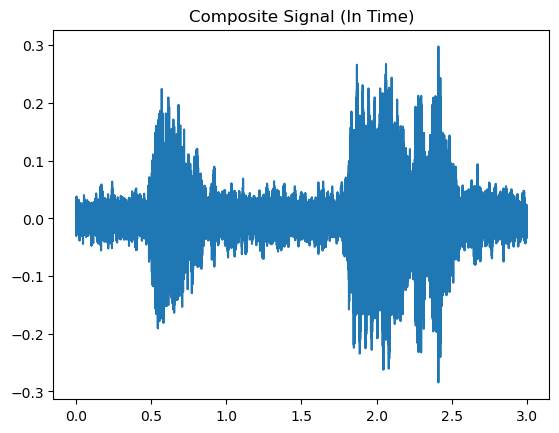

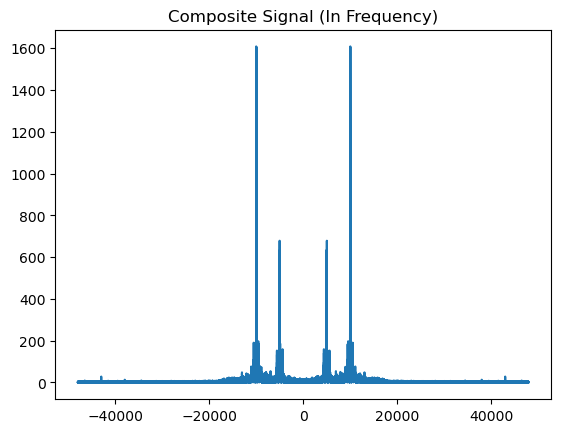

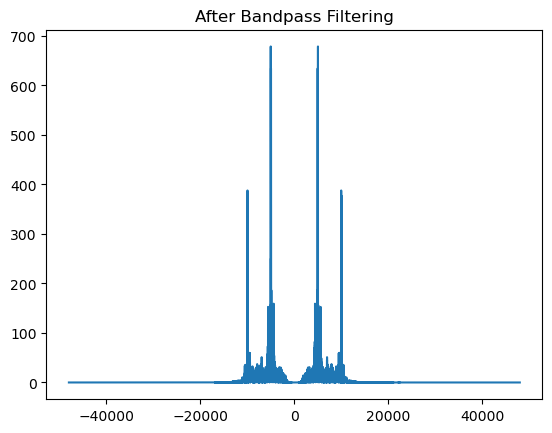

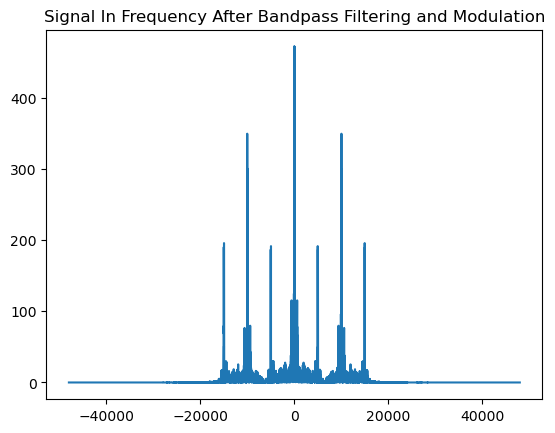

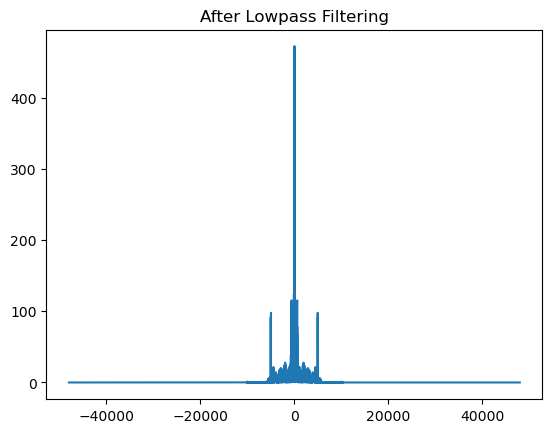

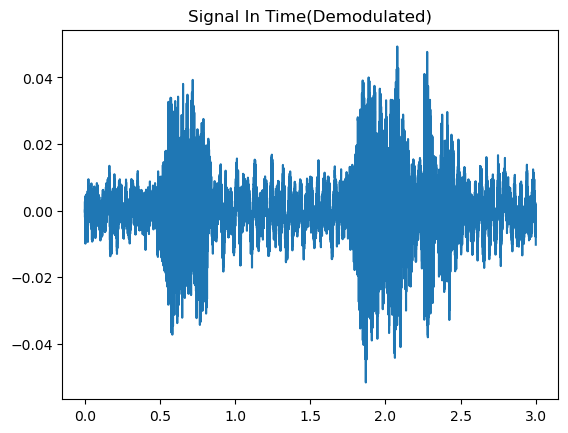

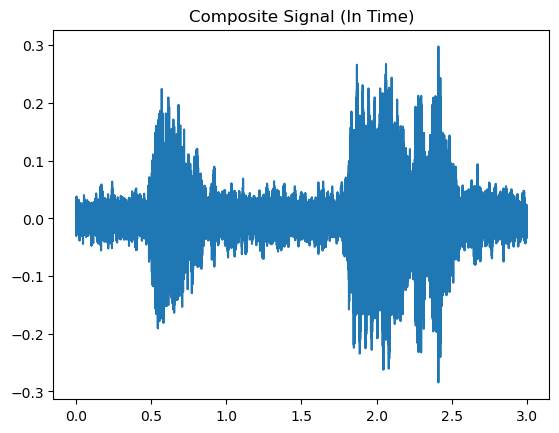

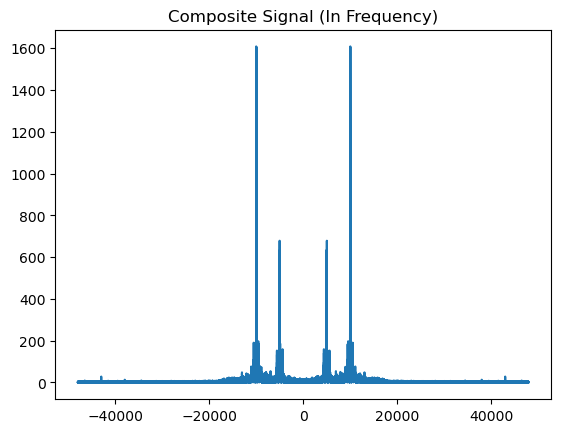

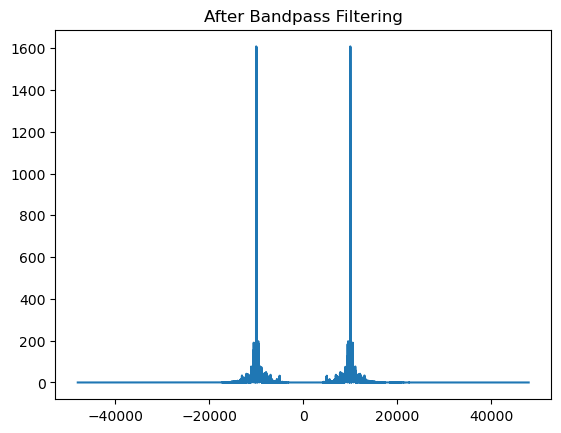

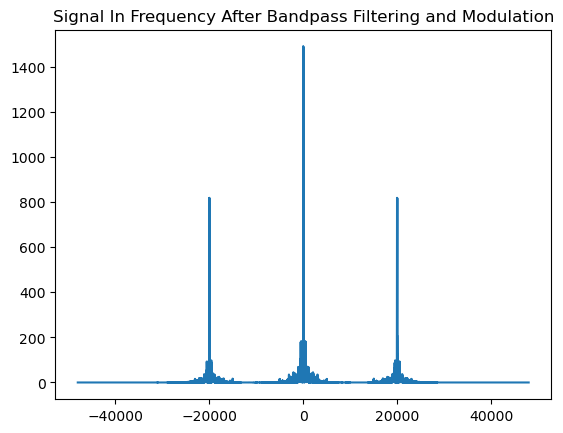

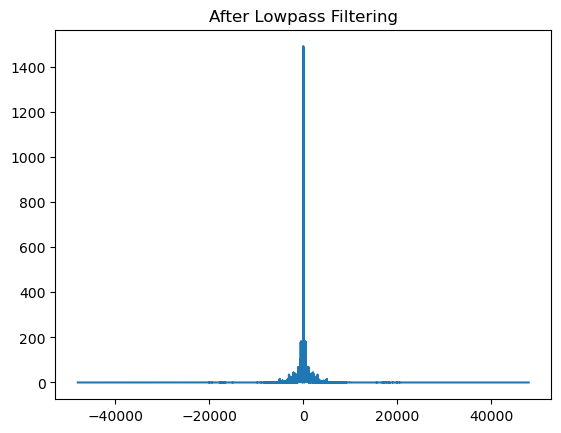

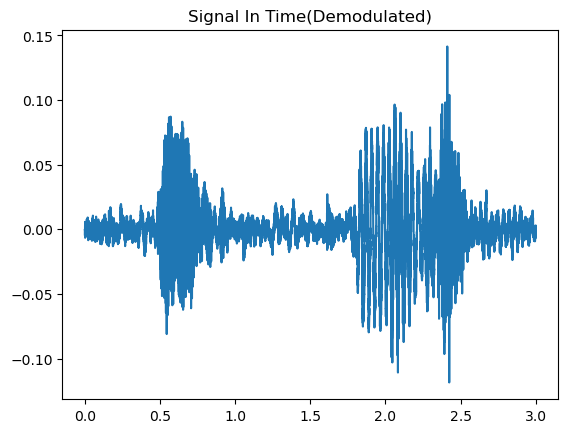

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
from scipy.io import wavfile
from numpy.fft import fft, fftfreq, fftshift
import sounddevice as sd

def demodulate_signal(signal, samplerate, frequency):
    low_fr = frequency - 3000
    high_fr = frequency + 3000
    length = len(signal) / samplerate
    times = np.linspace(0, length, signal.shape[0])
    frequencies = np.linspace(-samplerate/2,samplerate/2,samplerate*int(length))

    #bandpass filtering
    b, a = sg.butter(4, [low_fr, high_fr], fs=samplerate, btype='band')
    signal_bp = sg.lfilter(b, a, signal)

    signal_bp_mod = np.multiply(signal_bp, np.cos(2*np.pi*frequency*times))

    #lowpass filtering
    b,a = sg.butter(4, frequency, fs=samplerate, btype='low')
    signal_lp = sg.filtfilt(b,a,signal_bp_mod)

    wavfile.write('Files/DemodulatedSignal'+str(frequency/1000)+'kHz.wav', samplerate, np.int16(signal_lp * 32767))

    plt.figure()
    plt.plot(times, signal)
    plt.title('Composite Signal (In Time)')
    plt.savefig('Files/CompositeSignalInTime_'+str(frequency/1000)+'kHz.png')

    plt.figure()
    plt.plot(frequencies, fftshift(np.abs(fft(signal))))
    plt.title('Composite Signal (In Frequency)')
    plt.savefig('Files/CompositeSignalInFrequency_'+str(frequency/1000)+'kHz.png')

    plt.figure()
    plt.plot(frequencies, fftshift(np.abs(fft(signal_bp))))
    plt.title('After Bandpass Filtering')
    plt.savefig('Files/SignalInFrequencyAfterBandassFiltering'+str(frequency/1000)+'kHz.png')

    plt.figure()
    plt.plot(frequencies, fftshift(np.abs(fft(signal_bp_mod))))
    plt.title('Signal In Frequency After Bandpass Filtering and Modulation')
    plt.savefig('Files/SignalInFrequencyModulatedAfterBandassFiltering'+str(frequency/1000)+'kHz.png')

    plt.figure()
    plt.plot(frequencies, fftshift(np.abs(fft(signal_lp))))
    plt.title('After Lowpass Filtering')
    plt.savefig('Files/SignalInFrequencyAfterLowpassFiltering'+str(frequency/1000)+'kHz.png')

    plt.figure()
    plt.plot(times, signal_lp)
    plt.title('Signal In Time(Demodulated)')
    plt.savefig('Files/DemodulatedSignalInTime'+str(frequency/1000)+'kHz.png')

    return signal_lp

with open('8.txt', 'r') as file:
    signal = file.read().splitlines()

signal = np.array(signal, dtype=float) #signal in time

signal1 = demodulate_signal(signal, 96000, 5000)
signal2 = demodulate_signal(signal, 96000, 10000)